# CWT plots

To open this notebook and generate these plots, first clone the repo. Now open the terminal and move to the repo folder. Then run this command to open this notebook in a Jupyterlab running in a docker container ([Docker Engine](https://docs.docker.com/install/) must be already installed on your machine):

`docker run --rm -p 10000:8888 -e JUPYTER_ENABLE_LAB=yes -v "$PWD":/home/jovyan/work arashsaeidpour/fabjupyterlab:plotly`

Now open your browser and type in this address to open the jupyterlab:

`localhost:10000`

Copy paste the token from the terminal window to log in. Now move to `/work/src/` to find this notebook. 

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from SignalProc import *
import seaborn as sns
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import plotly.express as px
import us
import pickle

import plotly
import plotly.offline as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from time import strptime
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

LABELS = ["Normal","Break"]


%matplotlib inline
%config InlineBackend.figure_format='retina'


from pandas.plotting import register_matplotlib_converters
sns.set(style='white', palette='muted', font_scale=1.0)
from matplotlib.ticker import NullFormatter
import plotly.express as px

In [15]:
plt.style.use('seaborn-bright')
perso_linewidth = 0.3
# This will change your default rcParams
def init_plotting():
    plt.rcParams['figure.figsize'] = (6.5,6.5)
    plt.rcParams['font.size'] = 10
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['axes.labelsize'] = plt.rcParams['font.size']
    plt.rcParams['axes.titlesize'] = 1.5*plt.rcParams['font.size']
    plt.rcParams['legend.fontsize'] = plt.rcParams['font.size']
    plt.rcParams['xtick.labelsize'] = plt.rcParams['font.size']
    plt.rcParams['ytick.labelsize'] = plt.rcParams['font.size']
    #plt.rcParams['savefig.dpi'] = 2*plt.rcParams['savefig.dpi']
    plt.rcParams['figure.dpi']= 150
    plt.rcParams['axes.linewidth'] = perso_linewidth
    plt.rcParams['savefig.dpi'] = '300'
    plt.rcParams['savefig.format'] = 'pdf'
    plt.rcParams['axes.facecolor'] = 'white'
    plt.rcParams['axes.edgecolor'] = '0'
    plt.rcParams['axes.grid'] = False
    plt.rcParams['grid.color']='white'
    plt.rcParams['grid.linestyle'] = '-'
    plt.rcParams['grid.linewidth'] = '0.4'
    plt.rcParams['axes.axisbelow'] = True
    plt.rcParams['legend.edgecolor'] = 'black'
    plt.rcParams['legend.facecolor'] = 'white'
    plt.rcParams['lines.markersize']= 2.3 
    plt.rcParams['lines.markeredgewidth']= '0.1'
    plt.rcParams['lines.color']= 'r' 
    plt.rcParams['lines.marker']= '' 
    plt.rcParams['lines.linestyle']= '-' 
    plt.rcParams['xtick.color']= 'black'
    plt.rcParams['ytick.color']= 'black'
    #plt.rcParams['axes.color_cycle']= ['#3778bf', '#feb308', '#a8a495', '#7bb274', '#825f87']
    plt.gca().spines['right'].set_color('none')
    plt.gca().spines['right'].set_visible('False')
    plt.gca().spines['top'].set_visible('False')
    plt.gca().spines['top'].set_color('none')
    plt.gca().xaxis.set_ticks_position('bottom')
    plt.gca().yaxis.set_ticks_position('left')
    plt.rcParams['ytick.minor.size']= 1.5
    plt.rcParams['ytick.major.width']= perso_linewidth
    plt.rcParams['ytick.minor.width']= perso_linewidth
    plt.rcParams['xtick.major.width']= perso_linewidth
    plt.rcParams['xtick.minor.width']= perso_linewidth

init_plotting()

plt.close()

### Centering the plots
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [16]:
df_A = pd.read_pickle('../00-RawData/Per_capita_incidence/df_A_37_states.pickle')
df_B = pd.read_pickle('../00-RawData/Per_capita_incidence/df_B_37_states.pickle')

In [17]:
df_phi_A = pd.read_pickle("../ProcessedData/PhaseAngles_0o9_1o1/Per_capita_data/lowpass_filter/df_phi_A_wrapped.pickle")
df_phi_B = pd.read_pickle("../ProcessedData/PhaseAngles_0o9_1o1/Per_capita_data/lowpass_filter/df_phi_B_wrapped.pickle")

### Global and local CWT spectra of states

#### Type A

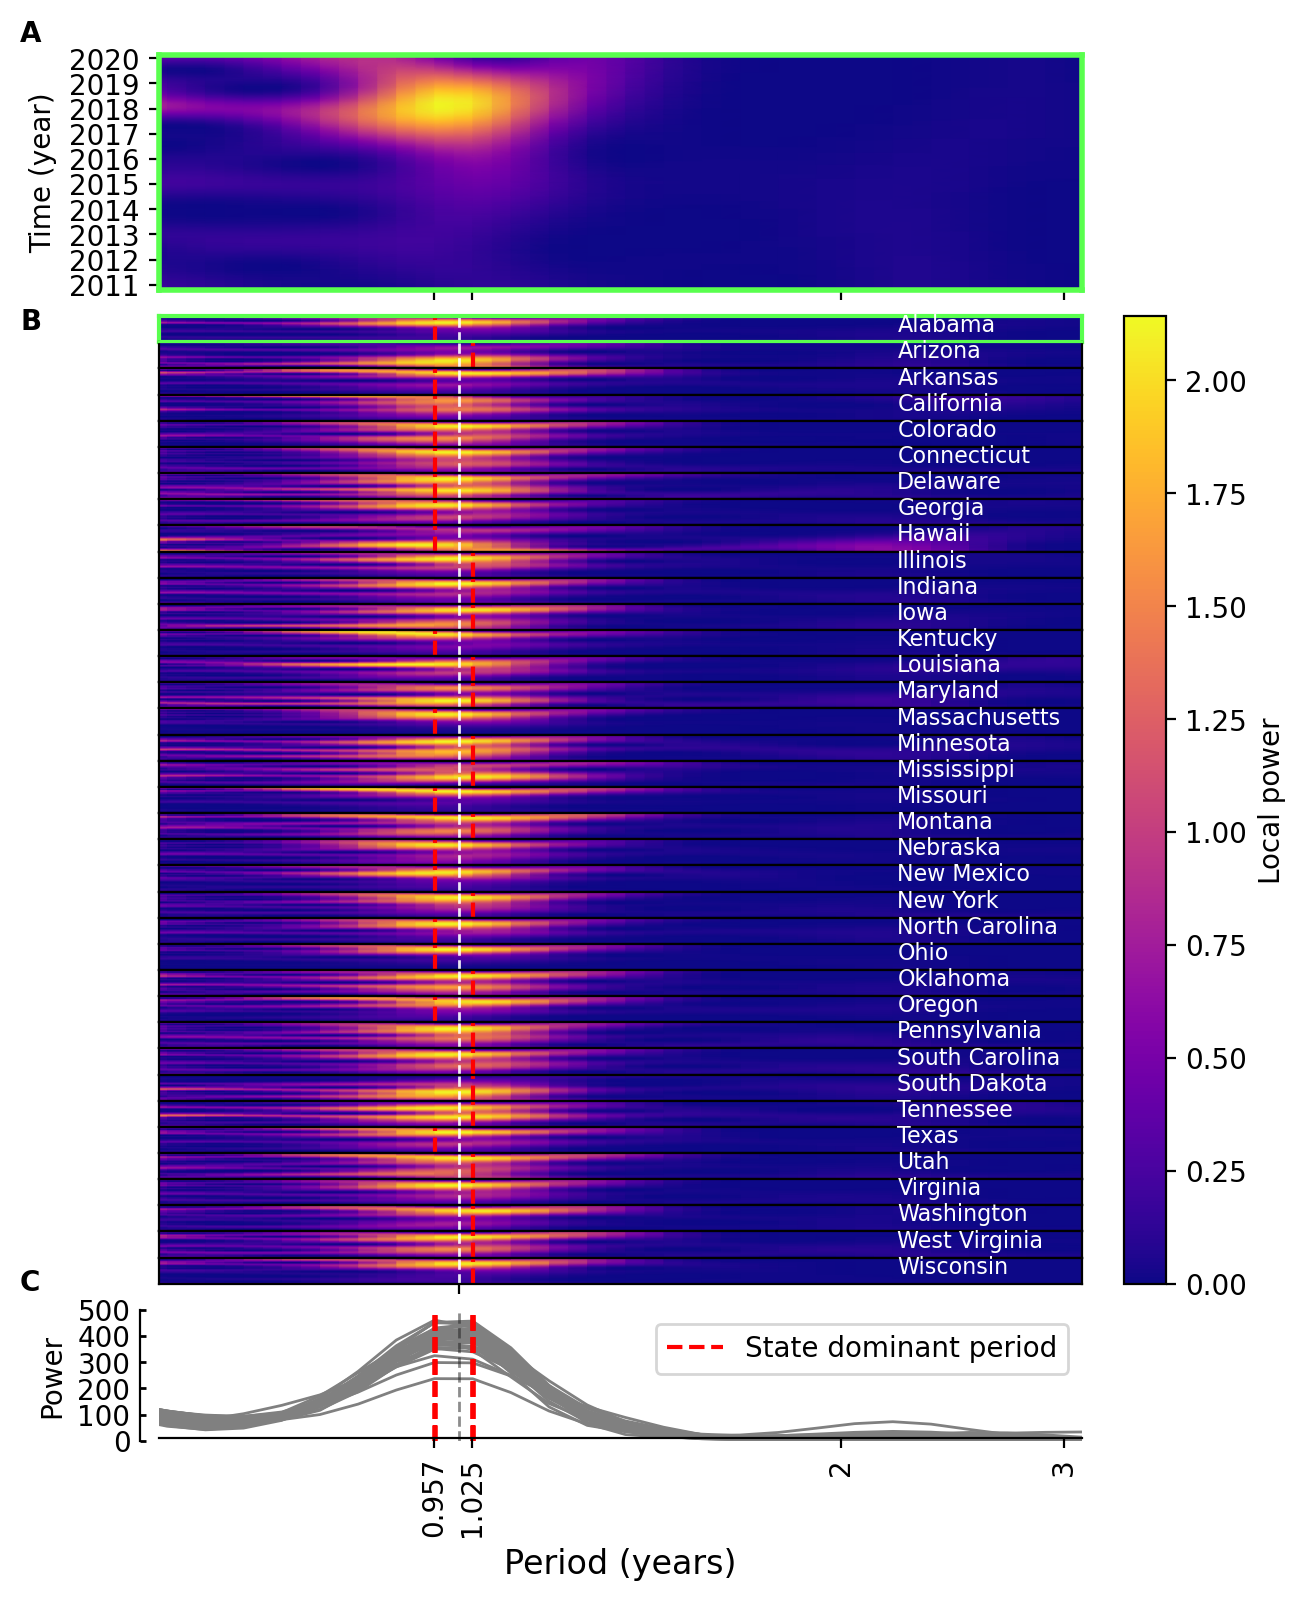

In [187]:
fig = plt.figure(figsize=(6.5, 9))
grid = plt.GridSpec(53, 24, hspace=0.0, wspace=0.0)


plt.style.use('default')
ylim_left= 0.58 #0.77
ylim_right= 3.1 #4.43
xtick_values=[0.957,1.025,2,3]
#right_edge = '2006'


state_sorted_alphabet = df_A.loc[:,(df_A.sum()>0)].columns



vertical_offset = 10


magnified_state = 'Alabama'
df_CWT_magnified=pd.read_pickle('../ProcessedData/StatesCWT/Per_capita_data/TypeA/'+magnified_state+'.pickle')
    

df_plot=np.abs(df_CWT_magnified)**2     ### Downsampled to every 4 weeks to reduce the file size
df_plot=df_plot.T
period_years=list(df_plot.columns)

ax_magnified_CWT_edge_color = '#59FF4E'
ax_magnified_CWT = fig.add_subplot(grid[:vertical_offset-1, :22])
ax_magnified_CWT.pcolormesh(period_years,df_plot.index, df_plot.values,cmap='plasma',shading='gouraud',rasterized=True)
ax_magnified_CWT.set_ylabel('Time (year)')
ax_magnified_CWT.set_xlim((ylim_left,ylim_right))


ax_magnified_CWT.xaxis.set_major_formatter(NullFormatter())
ax_magnified_CWT.xaxis.set_minor_formatter(NullFormatter())




ax_magnified_CWT.set_xscale('log')
ax_magnified_CWT.minorticks_off()
ax_magnified_CWT.set_xticks(xtick_values)
ax_magnified_CWT.set_xticklabels([])


for spine in ax_magnified_CWT.spines.items():
    spine[1].set_linewidth(2)
    spine[1].set_color(ax_magnified_CWT_edge_color)
    



ax_global_power = fig.add_subplot(grid[48:, :22])


dominant_period_label = "State dominant period"
for i,state in enumerate(state_sorted_alphabet):
    df_CWT_state=pd.read_pickle('../ProcessedData/StatesCWT/Per_capita_data/TypeA/'+state+'.pickle')
    

    
    df_plot=np.abs(df_CWT_state)**2     ### Downsampled to every 4 weeks to reduce the file size
    df_plot=df_plot.T
    period_years=list(df_plot.columns)

    ax = fig.add_subplot(grid[vertical_offset + i:vertical_offset+i+1, :22])
    WT=ax.pcolormesh(period_years,df_plot.index, df_plot.values,cmap='plasma',shading='gouraud',rasterized=True)
    if i==0:
        cbar_datum=WT
        for spine in ax.spines.items():
            spine[1].set_linewidth(1.5)
            spine[1].set_color(ax_magnified_CWT_edge_color)
    if i==1:
        ax.spines['top'].set_color(ax_magnified_CWT_edge_color) 
        
    ax.axvline(x=1,linestyle='--',linewidth=1,color='white',alpha=0.9)
    ax.text(x=0.80,y=0.4,s=state,transform=ax.transAxes,fontsize=8,color='white')
    ax.set_yticks([])
    ax.set_xlim((ylim_left,ylim_right))
    ax.set_xscale('log')
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.xaxis.set_minor_formatter(NullFormatter())
    ax_global_power.plot(df_plot.columns.values,df_plot.sum(axis=0),'-',linewidth=1,color='grey',zorder=0)
    ax_global_power.axvline(df_plot.sum().idxmax(),color='red',linestyle='--',zorder=1,label=dominant_period_label)
    ax.axvline(df_plot.sum().idxmax(),color='red',linestyle='--',zorder=1,label=dominant_period_label)
    dominant_period_label=None



ax.xaxis.set_major_formatter(NullFormatter())
ax.xaxis.set_minor_formatter(NullFormatter())
ax.minorticks_off()

ax_colorbar_CWT = fig.add_subplot(grid[vertical_offset:vertical_offset+i+1, 23:])
cbar_CWT = plt.colorbar(cbar_datum,cax=ax_colorbar_CWT)
cbar_CWT.ax.set_ylabel('Local power',fontsize=10)


ax_global_power.tick_params(direction='in',length=2,width=1,axis='y')
ax_global_power.set_xscale('log')



ax_global_power.spines['right'].set_color('none')
ax_global_power.spines['top'].set_color('none')



ax_global_power.spines['left'].set_position(('axes', -0.02))
ax_global_power.set_yticks([0,100,200,300,400,500])
ax_global_power.set_yticklabels([0,100,200,300,400,500])
ax_global_power.set_ylim((0,500))
ax_global_power.spines['left'].set_bounds(0,500)

ax_global_power.yaxis.set_ticks_position('left')



ax_global_power.spines['bottom'].set_position(('axes', 0.02))
ax_global_power.set_xlim((ylim_left,ylim_right))
ax_global_power.spines['bottom'].set_bounds(ylim_left,ylim_right)



ax_global_power.set_xlim((ylim_left,ylim_right))

ax_global_power.axvline(x=1,linestyle='--',linewidth=1,color='k',alpha=0.5)

ax_global_power.set_xlabel('Period (years)', fontsize=12)
ax_global_power.legend()




xtick_pos = xtick_values

#ax.set_xticks(xtick_pos)
#ax.set_xticklabels(xtick_values,rotation=90)

ax_global_power.set_xticks(xtick_pos)
ax_global_power.set_xticklabels(xtick_values,rotation=90)
ax_global_power.set_ylabel('Power')
ax_global_power.minorticks_off()

ax_global_power.text(x=-0.15,y=10.7,s='A',transform=ax_global_power.transAxes,weight='bold')
ax_global_power.text(x=-0.15,y=8.50,s='B',transform=ax_global_power.transAxes,weight='bold')
ax_global_power.text(x=-0.15,y=1.15,s='C',transform=ax_global_power.transAxes,weight='bold')


plt.savefig('./paper_output/Fig2_Type_A_CWT_per_Capita.pdf',dpi=300,bbox_inches='tight',pad_inche=0)
#with open('./output/Fig2_Type_A_CWT_per_Capita.pickle','wb') as fp:
#     pickle.dump(fig,fp)

plt.show()
    

**Fig. X** Continuous wavelet analysis of influenza Type A in the United States **(A)** Global power spectra **(B)** Local power spectra; red dashed line shows the dominant period in each state and white dashed line presents the 1-year period.

#### Type B

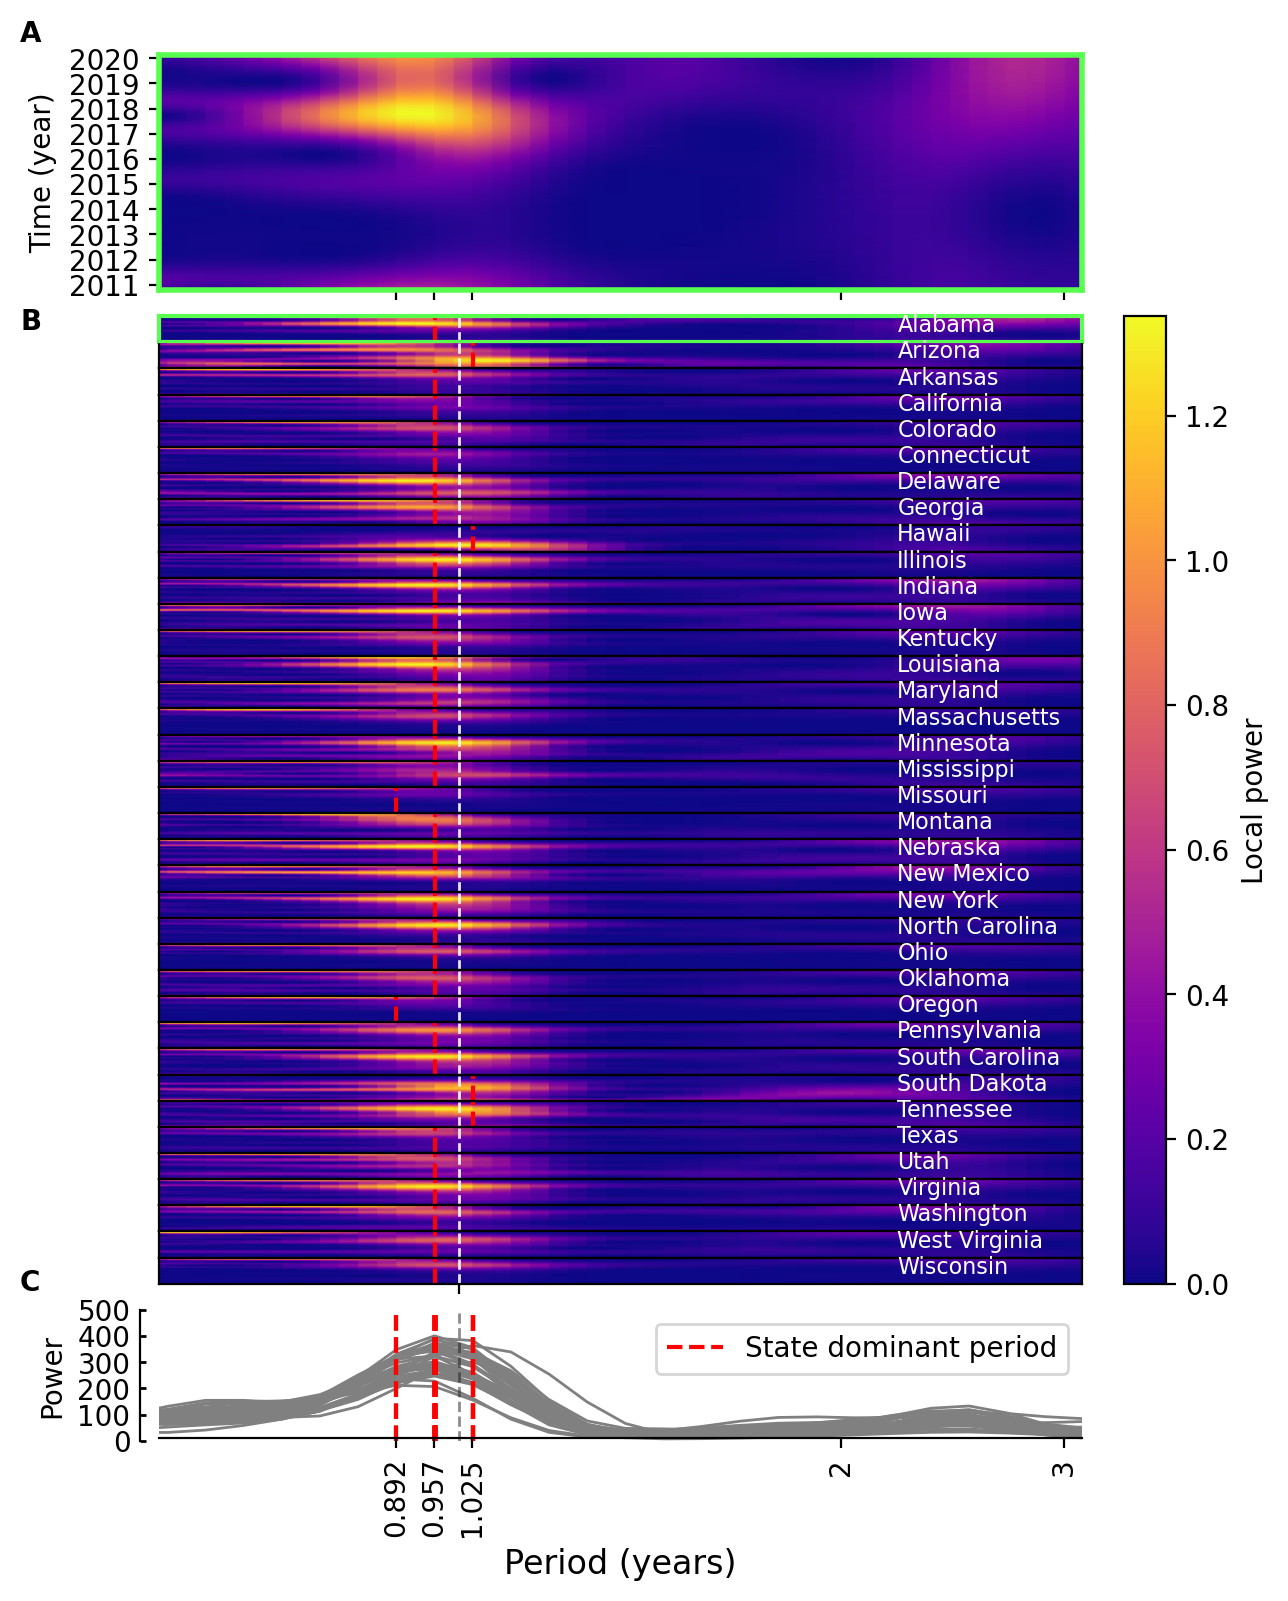

In [188]:
fig = plt.figure(figsize=(6.5, 9))
grid = plt.GridSpec(53, 24, hspace=0.0, wspace=0.0)


plt.style.use('default')
ylim_left= 0.58 #0.77
ylim_right= 3.1 #4.43
xtick_values=[0.892,0.957,1.025,2,3]
#right_edge = '2006'


state_sorted_alphabet = df_A.loc[:,(df_A.sum()>0)].columns


#unique_years= df_cases[borough_sorted_by_cum_cases][:right_edge].T.columns.year.unique()

vertical_offset = 10


magnified_state = 'Alabama'
df_CWT_magnified=pd.read_pickle('../ProcessedData/StatesCWT/Per_capita_data/TypeB/'+magnified_state+'.pickle')
    

df_plot=np.abs(df_CWT_magnified)**2     ### Downsampled to every 4 weeks to reduce the file size
df_plot=df_plot.T
period_years=list(df_plot.columns)

ax_magnified_CWT_edge_color = '#59FF4E'
ax_magnified_CWT = fig.add_subplot(grid[:vertical_offset-1, :22])
ax_magnified_CWT.pcolormesh(period_years,df_plot.index, df_plot.values,cmap='plasma',shading='gouraud',rasterized=True)
ax_magnified_CWT.set_ylabel('Time (year)')
ax_magnified_CWT.set_xlim((ylim_left,ylim_right))


ax_magnified_CWT.xaxis.set_major_formatter(NullFormatter())
ax_magnified_CWT.xaxis.set_minor_formatter(NullFormatter())




ax_magnified_CWT.set_xscale('log')
ax_magnified_CWT.minorticks_off()
ax_magnified_CWT.set_xticks(xtick_values)
ax_magnified_CWT.set_xticklabels([])


for spine in ax_magnified_CWT.spines.items():
    spine[1].set_linewidth(2)
    spine[1].set_color(ax_magnified_CWT_edge_color)
    



ax_global_power = fig.add_subplot(grid[48:, :22])


dominant_period_label = "State dominant period"
for i,state in enumerate(state_sorted_alphabet):
    df_CWT_state=pd.read_pickle('../ProcessedData/StatesCWT/Per_capita_data/TypeB/'+state+'.pickle')
    

    
    df_plot=np.abs(df_CWT_state)**2     
    df_plot=df_plot.T
    period_years=list(df_plot.columns)

    ax = fig.add_subplot(grid[vertical_offset + i:vertical_offset+i+1, :22])
    WT=ax.pcolormesh(period_years,df_plot.index, df_plot.values,cmap='plasma',shading='gouraud',rasterized=True)
    if i==0:
        cbar_datum=WT
        for spine in ax.spines.items():
            spine[1].set_linewidth(1.5)
            spine[1].set_color(ax_magnified_CWT_edge_color)
    if i==1:
        ax.spines['top'].set_color(ax_magnified_CWT_edge_color) 
        
    ax.axvline(x=1,linestyle='--',linewidth=1,color='white',alpha=0.9)
    ax.text(x=0.80,y=0.4,s=state,transform=ax.transAxes,fontsize=8,color='white')
    ax.set_yticks([])
    ax.set_xlim((ylim_left,ylim_right))
    ax.set_xscale('log')
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.xaxis.set_minor_formatter(NullFormatter())
    ax_global_power.plot(df_plot.columns.values,df_plot.sum(axis=0),'-',linewidth=1,color='grey',zorder=0)
    ax_global_power.axvline(df_plot.sum().idxmax(),color='red',linestyle='--',zorder=1,label=dominant_period_label)
    ax.axvline(df_plot.sum().idxmax(),color='red',linestyle='--',zorder=1,label=dominant_period_label)
    dominant_period_label=None


ax.xaxis.set_major_formatter(NullFormatter())
ax.xaxis.set_minor_formatter(NullFormatter())
ax.minorticks_off()

ax_colorbar_CWT = fig.add_subplot(grid[vertical_offset:vertical_offset+i+1, 23:])
cbar_CWT = plt.colorbar(cbar_datum,cax=ax_colorbar_CWT)
cbar_CWT.ax.set_ylabel('Local power',fontsize=10)


ax_global_power.tick_params(direction='in',length=2,width=1,axis='y')
ax_global_power.set_xscale('log')



ax_global_power.spines['right'].set_color('none')
ax_global_power.spines['top'].set_color('none')



ax_global_power.spines['left'].set_position(('axes', -0.02))
ax_global_power.set_yticks([0,100,200,300,400,500])
ax_global_power.set_yticklabels([0,100,200,300,400,500])
ax_global_power.set_ylim((0,500))
ax_global_power.spines['left'].set_bounds(0,500)

ax_global_power.yaxis.set_ticks_position('left')
#ax_global_power.text(x=1.1,y=0.08,s='Global power',transform=ax_global_power.transAxes,rotation=90)


ax_global_power.spines['bottom'].set_position(('axes', 0.02))
ax_global_power.set_xlim((ylim_left,ylim_right))
ax_global_power.spines['bottom'].set_bounds(ylim_left,ylim_right)


#ax.set_xlim((ylim_left,ylim_right))
ax_global_power.set_xlim((ylim_left,ylim_right))

ax_global_power.axvline(x=1,linestyle='--',linewidth=1,color='k',alpha=0.5)

ax_global_power.set_xlabel('Period (years)', fontsize=12)
ax_global_power.legend()




xtick_pos = xtick_values

#ax.set_xticks(xtick_pos)
#ax.set_xticklabels(xtick_values,rotation=90)

ax_global_power.set_xticks(xtick_pos)
ax_global_power.set_xticklabels(xtick_values,rotation=90)
ax_global_power.set_ylabel('Power')
ax_global_power.minorticks_off()

ax_global_power.text(x=-0.15,y=10.7,s='A',transform=ax_global_power.transAxes,weight='bold')
ax_global_power.text(x=-0.15,y=8.50,s='B',transform=ax_global_power.transAxes,weight='bold')
ax_global_power.text(x=-0.15,y=1.15,s='C',transform=ax_global_power.transAxes,weight='bold')


plt.savefig('./paper_output/Fig3_Type_B_CWT_per_Capita.pdf',dpi=300,bbox_inches='tight',pad_inche=0)
#with open('./output/Fig2_Type_A_CWT_per_Capita.pickle','wb') as fp:
#     pickle.dump(fig,fp)

plt.show()
    

**Fig. X** Continuous wavelet analysis of influenza Type B in the United States **(A)** Global power spectra **(B)** Local power spectra; red dashed line shows the dominant period in each state and white dashed line presents the 1-year period.